In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("train_hr.csv")
df2 = pd.read_csv("test_hr.csv")

In [3]:
#X_train = df1.iloc[:,6:13]
#y_train = df1.iloc[:, 13]

In [4]:
df3 = df1.drop(["is_promoted"], axis =1)
df4 = pd.concat([df3,df2], sort = "False")
df4.set_index('employee_id', inplace=True)

In [5]:
a = df4["education"].value_counts()
df4["education"].fillna("Bachelor's", inplace = True)
b = df4['previous_year_rating'].mean()
df4['previous_year_rating'].fillna(b, inplace = True)

In [6]:
df4.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,gender,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region
employee_id,,,,,,,,,,,,
65438,1,35,49,0,Sales & Marketing,Master's & above,f,8,1,5.0,sourcing,region_7
65141,0,30,60,0,Operations,Bachelor's,m,4,1,5.0,other,region_22
7513,0,34,50,0,Sales & Marketing,Bachelor's,m,7,1,3.0,sourcing,region_19
2542,0,39,50,0,Sales & Marketing,Bachelor's,m,10,2,1.0,other,region_23
48945,0,45,73,0,Technology,Bachelor's,m,2,1,3.0,other,region_26


In [7]:
#finding correlation between features
cor=df4.corr()
cor

,KPIs_met >80%,age,avg_training_score,awards_won?,length_of_service,no_of_trainings,previous_year_rating
KPIs_met >80%,1.000000,-0.026223,0.076729,0.100365,-0.077854,-0.043912,0.337397
age,-0.026223,1.000000,-0.044592,-0.007357,0.653339,-0.082536,0.008681
avg_training_score,0.076729,-0.044592,1.000000,0.072655,-0.035272,0.044180,0.068801
awards_won?,0.100365,-0.007357,0.072655,1.000000,-0.040556,-0.004818,0.026574
length_of_service,-0.077854,0.653339,-0.035272,-0.040556,1.000000,-0.058403,0.001005
no_of_trainings,-0.043912,-0.082536,0.044180,-0.004818,-0.058403,1.000000,-0.055326
previous_year_rating,0.337397,0.008681,0.068801,0.026574,0.001005,-0.055326,1.000000


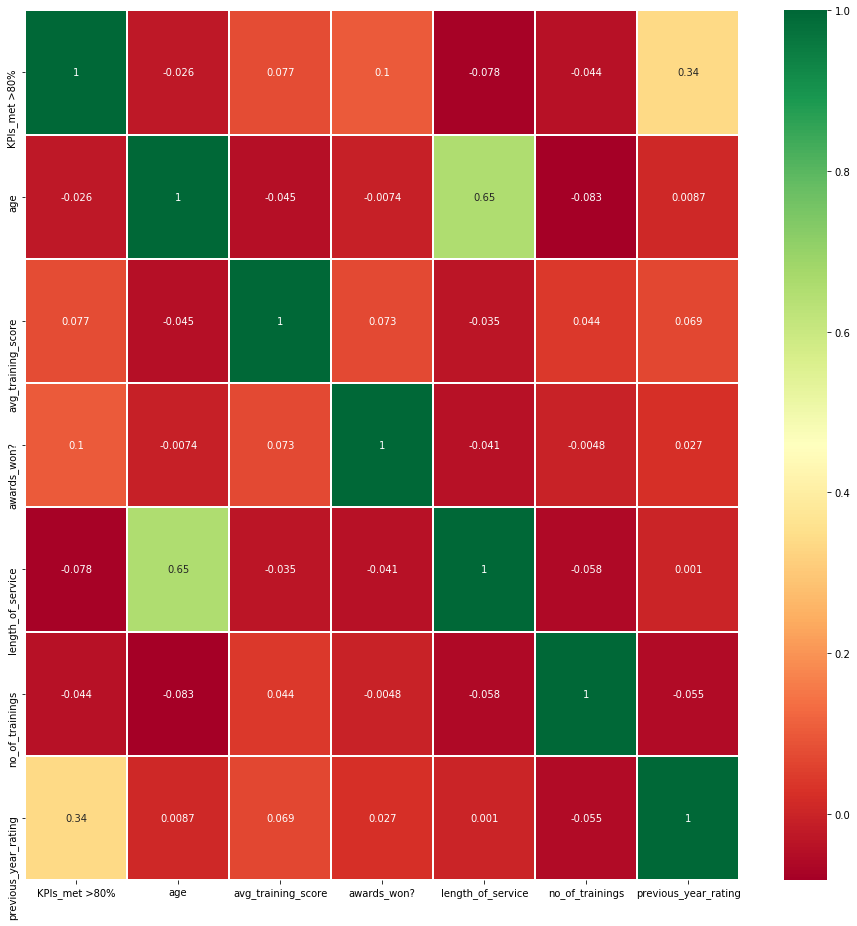

In [8]:
#plotting features correlation
plt.figure(figsize=(16,16))
sns.heatmap(cor,cmap='RdYlGn',annot=True,linewidth=1,linecolor='white')
plt.savefig("correlation.png")

In [9]:
#df4 = df4.drop(["length_of_service"], axis=1)
#df4 = df4.drop(["no_of_trainings"], axis=1)
df4 = df4.drop(['region'], axis=1)
df4 = df4.drop(['recruitment_channel'], axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()
df4['department'] = le.fit_transform(df4['department'])
df4['education'] = le.fit_transform(df4['education'])
df4['gender'] = le.fit_transform(df4['gender'])
df4.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,gender,length_of_service,no_of_trainings,previous_year_rating
employee_id,,,,,,,,,,
65438,1,35,49,0,7,2,0,8,1,5.0
65141,0,30,60,0,4,0,1,4,1,5.0
7513,0,34,50,0,7,0,1,7,1,3.0
2542,0,39,50,0,7,0,1,10,2,1.0
48945,0,45,73,0,8,0,1,2,1,3.0


In [11]:
onehotencoder1 = OneHotEncoder(categorical_features = [5])
df4 = onehotencoder1.fit_transform(df4).toarray()
df4 = df4[:, 1:]

onehotencoder2 = OneHotEncoder(categorical_features = [6])
df4 = onehotencoder2.fit_transform(df4).toarray()
df4 = df4[:, 1:]

#onehotencoder3 = OneHotEncoder(categorical_features = [5])
#df4 = onehotencoder3.fit_transform(df4).toarray()
#df4 = df4[:, 1:]


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer dat

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df4 = sc.fit_transform(df4)


In [13]:
train = df4[:54808,:]
test = df4[54808:, :]

y = df1['is_promoted']

In [ ]:
#Fitting Random Forest Classification to the training Set
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 500 , criterion = 'entropy', random_state = 0)
#classifier.fit(train , y)

In [ ]:
# Fitting SVM to the Training set
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'poly' , random_state=0)
#classifier.fit(train , y)


In [ ]:
pip install xgboost

In [14]:
#XGboost Classifier
import xgboost as xgb
classifier = xgb.XGBClassifier(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

classifier.fit(train,y)
#clf = classifier.fit(X_train,y_train)



#Series = pd.Series(data = clf.feature_importances_, index = X_train.columns.values)    
#results = Series.sort_values(axis=0, ascending=False).index.tolist()   

#results
 

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1.5, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0.75,
              reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
              tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
#LightGBM Classifier
#import lightgbm as ltb
#classifier = ltb.LGBMClassifier(n_estimator=50000, random_state=42, learning_rate=0.1, reg_alpha=0.75, reg_lambda=0.45, colsample_bytree=0.4)
#classifier.fit(train, y)

In [15]:
#Predicitng the test set results
y_pred1= classifier.predict(test)
y1 = pd.DataFrame(y_pred1)

In [16]:
dff = pd.DataFrame(df2['employee_id'])
dff['is_promoted'] = None
dff['is_promoted'] = y1
dff['is_promoted'] = np.int64(dff['is_promoted'])
dff = dff.set_index('employee_id')

In [17]:
dff.to_csv('sheet.csv')